In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime

1. Is there a relationship between Milwaukee rainfall and elevated E. coli level in the Chicago beaches?

Given the data analyzed, there does not appear to be a correlation between the rainfall and E. coli levels. Both the culture measurements and the DNA measurments yield poor r-squared values, 0.0045 and 0.00028 respectively, indicating there is not much of a relationship present. Additionally, both tests have p-values greater than 0.05, with 0.059 and 0.72 for the culture test and DNA test, respectively, indicating there is not a statistical significance in the data. 

In [2]:
# Reading in Milwaukee rain data for culture sampling
culture_rain_data = pd.read_csv("Milwaukee_Culture_Rainfall.csv", index_col=0)

# Converting date to datetime format
culture_rain_data["Date"] = pd.to_datetime(culture_rain_data["Date"],format= "%Y-%m-%d")
culture_rain_data["Date"] = pd.to_datetime(culture_rain_data["Date"], yearfirst=True)
culture_rain_data["Year"] = pd.DatetimeIndex(culture_rain_data["Date"]).year
culture_rain_data["Month"] = pd.DatetimeIndex(culture_rain_data["Date"]).month

In [3]:
# Reading in city wide culture data
city_culture_ecoli = pd.read_csv("culture_daily_citywide_means.csv", index_col =0)
city_culture_ecoli["Date"] = pd.to_datetime(city_culture_ecoli["Date"],format= "%Y-%m-%d")

# Merging culture results with weather data
culture_rain_ecoli = pd.merge(culture_rain_data, city_culture_ecoli, how="left", on="Date")

The r-squared value is 0.004574507459009841
The p-value is 0.05983630141224942


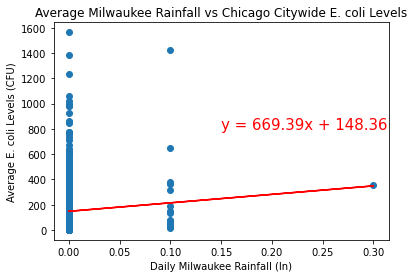

<Figure size 432x288 with 0 Axes>

In [4]:
# Plotting the weather data vs the culture technique E. coli levels 
# Calculate regression curve 
x_values = culture_rain_ecoli["Rainfall (In)"]
y_values = culture_rain_ecoli["Citywide Mean E Coli Level"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.15,800),fontsize=15,color="red")
plt.xlabel("Daily Milwaukee Rainfall (In)")
plt.ylabel("Average E. coli Levels (CFU)")
plt.title("Average Milwaukee Rainfall vs Chicago Citywide E. coli Levels")
print(f"The r-squared value is {rvalue**2}")
print(f"The p-value is {pvalue}")
plt.show()
plt.savefig("output/Mil_Rain_vs_City_Culture_Data.png")

In [5]:
# Reading in the Milwaukee weather dates for DNA sampling
DNA_rain_data = pd.read_csv("Milwaukee_DNA_Rainfall.csv", index_col=0)
DNA_rain_data["Date"] = pd.to_datetime(DNA_rain_data["Date"],format= "%Y-%m-%d")
DNA_rain_data["Date"] = pd.to_datetime(DNA_rain_data["Date"], yearfirst=True)
DNA_rain_data["Year"] = pd.DatetimeIndex(DNA_rain_data["Date"]).year
DNA_rain_data["Month"] = pd.DatetimeIndex(DNA_rain_data["Date"]).month


In [8]:
# Reading in the city wide DNA data 
city_dna_ecoli = pd.read_csv("DNA_daily_citywide_means.csv", index_col =0)
city_dna_ecoli["Date"] = pd.to_datetime(city_dna_ecoli["Date"],format= "%Y-%m-%d")

# Merging DNA data with weather data
DNA_rain_ecoli = pd.merge(DNA_rain_data, city_dna_ecoli, how="left", on="Date")
DNA_rain_ecoli = DNA_rain_ecoli.dropna()

The r-squared value is 4.939432649065349e-06
The p-value is 0.9633482666973501


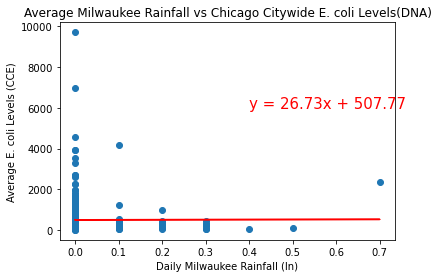

<Figure size 432x288 with 0 Axes>

In [9]:
# Plotting the weather data vs the DNA technique E. coli levels 
# Calculate regression curve 
x_values = DNA_rain_ecoli["Rainfall (In)"]
y_values = DNA_rain_ecoli["Citywide Mean E Coli Level"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,6000),fontsize=15,color="red")
plt.xlabel("Daily Milwaukee Rainfall (In)")
plt.ylabel("Average E. coli Levels (CCE)")
plt.title("Average Milwaukee Rainfall vs Chicago Citywide E. coli Levels(DNA)")
print(f"The r-squared value is {rvalue**2}")
print(f"The p-value is {pvalue}")
plt.show()
plt.savefig("output/Mil_Rain_vs_City_DNA_Data.png")